In [ ]:
import numpy as np
import os
import cv2
import glob as glob
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import mean_squared_error
from typing import Union
import warnings
from features import *
from evaluate import *
from ImageQualityAssessmentPAD import *
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
os.getcwd()

'/home/anhnq47/Documents/Anti_Spoofing'

In [3]:
file_path = '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace'
real_faces = glob.glob(f'{file_path}/Client*/*/*.jpg')
fake_faces = glob.glob(f'{file_path}/Imposter*/*/*.jpg')
real_faces

['/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_0.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_101.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_105.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_109.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_112.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_116.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_12.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_123.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/0001/0001_00_00_01_127.jpg',
 '/media/anhnq47/Arkham/AntiSpoofing Dataset/NUAA/DetectedFace/ClientFace/00

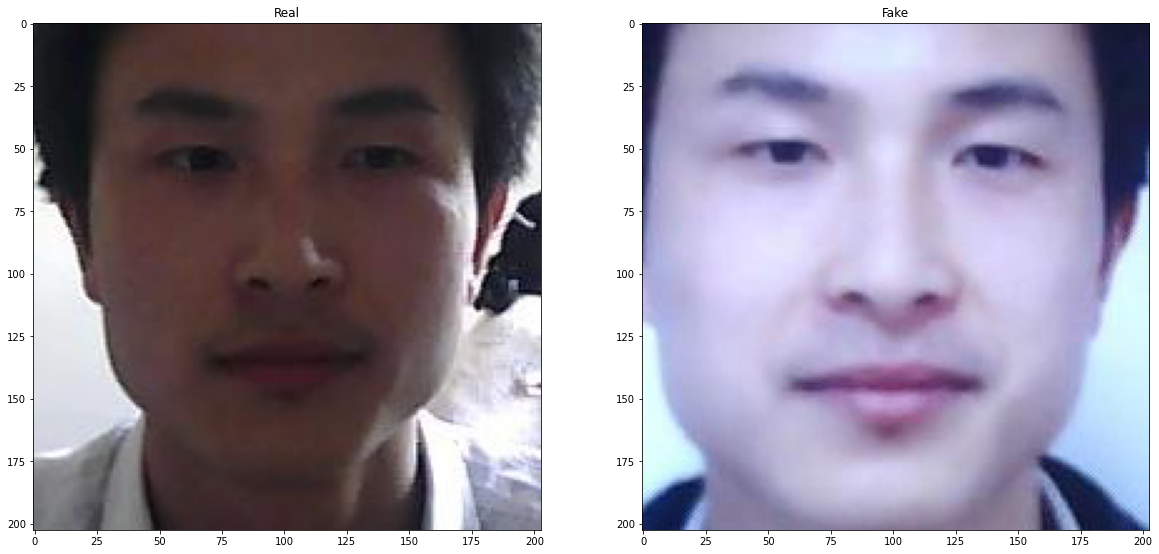

In [4]:
index = 3
real_img = plt.imread(real_faces[index])
fake_img = plt.imread(fake_faces[index])
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.imshow(real_img)
ax1.set_title('Real')
ax2.imshow(fake_img)
ax2.set_title('Fake')
plt.show()


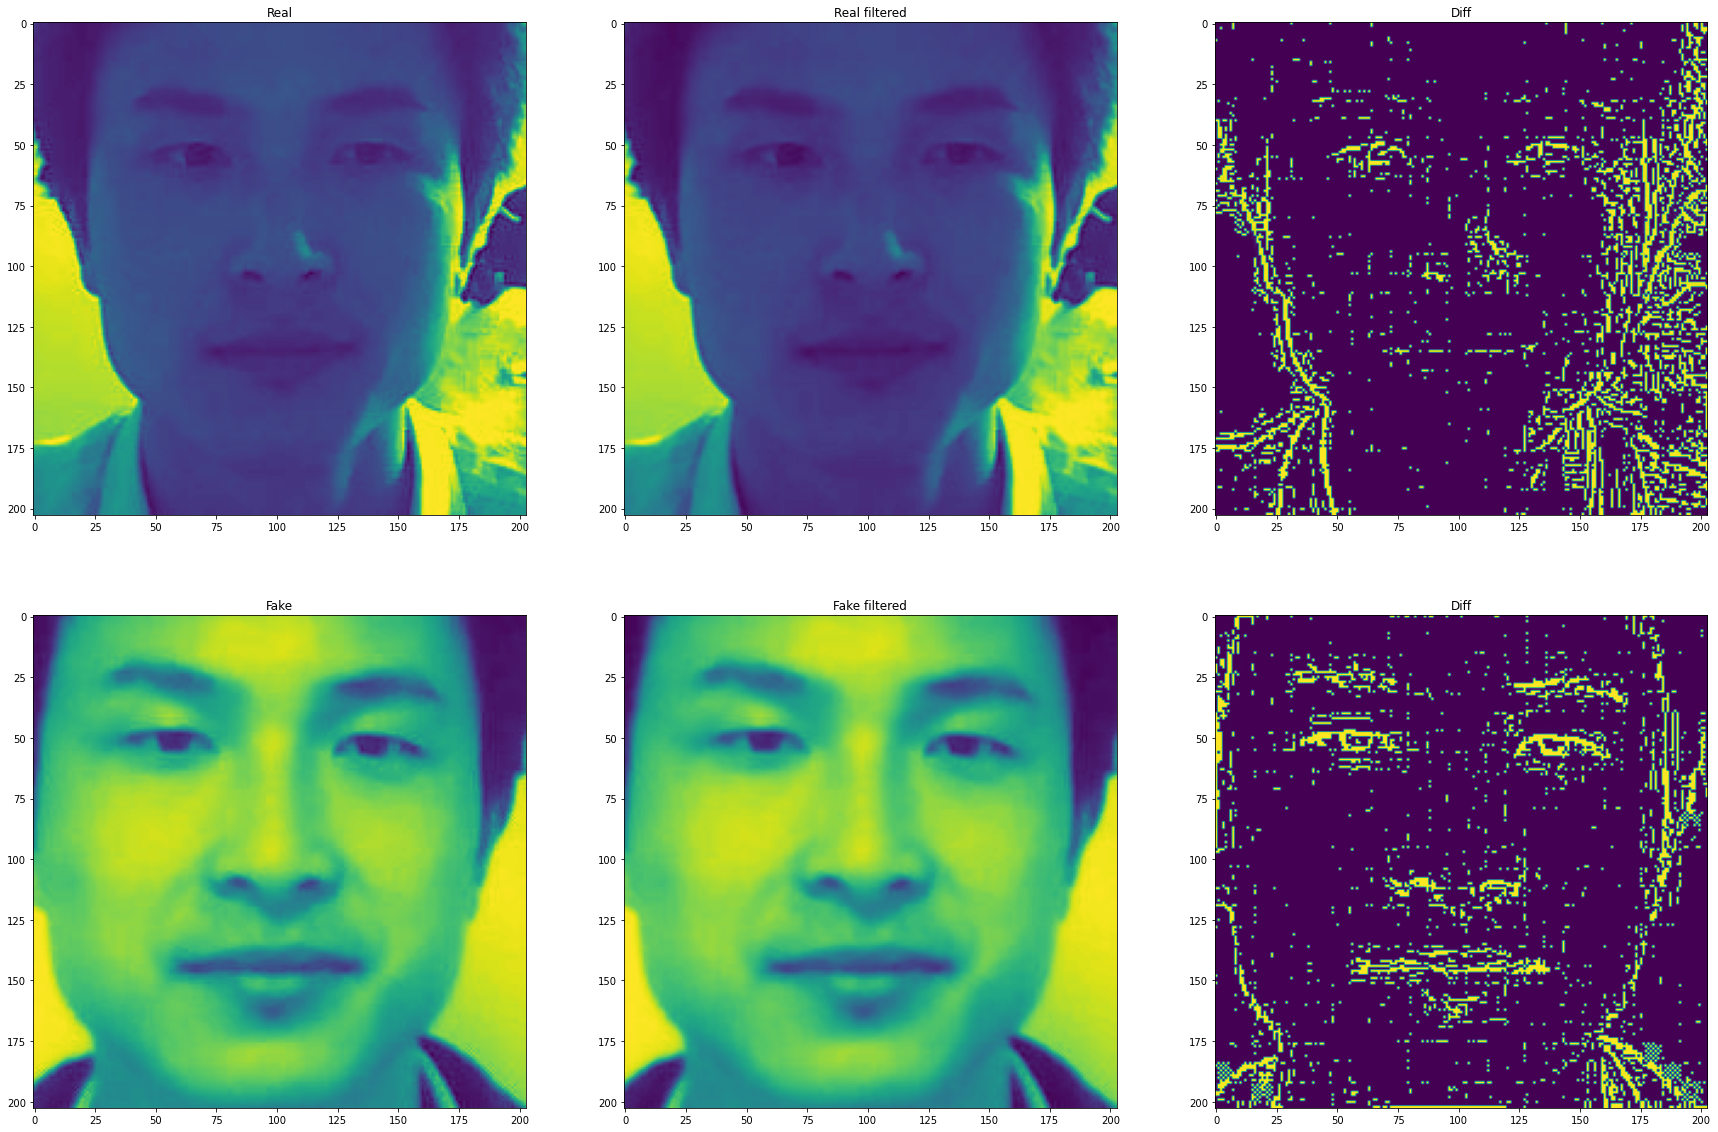

In [5]:
fig, axs = plt.subplots(2,3, figsize = (30,20))
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY)
axs[0,0].imshow(real_img)
axs[0,0].set_title('Real')

real_blur = cv2.GaussianBlur(real_img, (3,3), sigmaX = 0.5, sigmaY = 0.5)
axs[0,1].imshow(real_blur)
axs[0,1].set_title('Real filtered')

real_unsharp_mask = real_img - real_blur 
axs[0,2].imshow(real_unsharp_mask)
axs[0,2].set_title('Diff')

fake_img = cv2.cvtColor(fake_img, cv2.COLOR_BGR2GRAY)
axs[1,0].imshow(fake_img)
axs[1,0].set_title('Fake')

fake_blur = cv2.GaussianBlur(fake_img, (3,3), sigmaX = 0.5, sigmaY = 0.5)
axs[1,1].imshow(fake_blur)
axs[1,1].set_title('Fake filtered')

fake_unsharp_mask = fake_img - fake_blur 
axs[1,2].imshow(fake_unsharp_mask)
axs[1,2].set_title('Diff')
plt.show()


In [25]:
real_img.shape

(203, 203)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


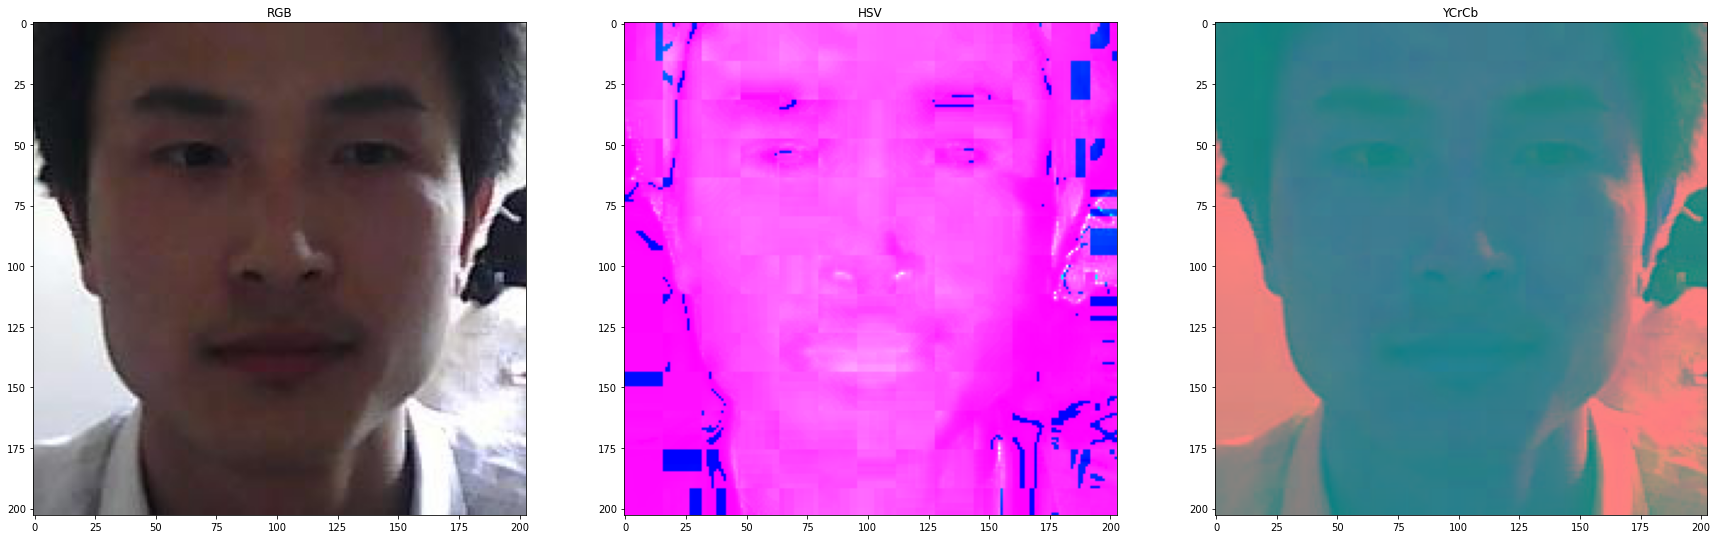

In [27]:
real_img = plt.imread(real_faces[index])
fig, axs = plt.subplots(1,3, figsize = (30,20))
axs[0].imshow(real_img)
axs[0].set_title('RGB')

HSV = cv2.cvtColor(np.float32(real_img), cv2.COLOR_BGR2HSV)
axs[1].imshow(HSV)
axs[1].set_title('HSV')

YCrCb = cv2.cvtColor(real_img, cv2.COLOR_BGR2YCrCb)
axs[2].imshow(YCrCb)
axs[2].set_title('YCrCb')
plt.show()


In [6]:
X = real_faces + fake_faces
print(len(X))
y = []
for path in X:
    if(path.split('/')[-3] == 'ImposterFace'):
        y.append(1)
    elif(path.split('/')[-3] == 'ClientFace'):
        y.append(0)
    else:
        raise('WTF')
np.unique(y, return_counts = True)

12614


(array([0, 1]), array([5105, 7509]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)


/home/anhnq47/Documents/Anti_Spoofing/features.py:353: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
/home/anhnq47/Documents/Anti_Spoofing/features.py:353: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))


Classification Report
              precision    recall  f1-score   support

        Real       0.99      0.98      0.99      1559
    Imposter       0.99      1.00      0.99      2226

    accuracy                           0.99      3785
   macro avg       0.99      0.99      0.99      3785
weighted avg       0.99      0.99      0.99      3785

Confusion Matrix


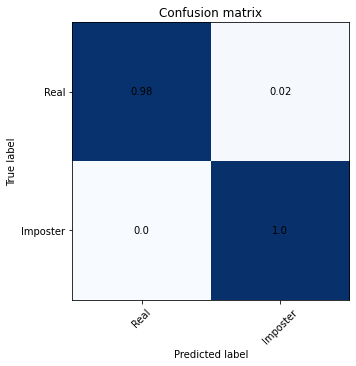

In [16]:
#YCrCb
clf = ImageQualityAssessmentPAD()
X_train_in_nparray = clf.DataGenerator(X_train, 'BoulkenafetYCrCb')
# X_train_in_nparray = load('features/Xtrain_42_YCrCb.npy')
clf.fit(X_train_in_nparray, y_train)
X_test_in_nparray = clf.DataGenerator(X_test, 'BoulkenafetYCrCb')
# X_test_in_nparray = load('features/Xtest_42_YCrCb.npy')
y_pred = clf.predict(X_test_in_nparray)
labels = ['Real', 'Imposter']
evaluate(y_pred, y_test, labels)

/home/anhnq47/Documents/Anti_Spoofing/features.py:353: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))
/home/anhnq47/Documents/Anti_Spoofing/features.py:353: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_= np.histogram(lbp,  normed=True, bins=max_bins, range=(0, max_bins))


Classification Report
              precision    recall  f1-score   support

        Real       1.00      0.98      0.99      1565
    Imposter       0.99      1.00      0.99      2220

    accuracy                           0.99      3785
   macro avg       0.99      0.99      0.99      3785
weighted avg       0.99      0.99      0.99      3785

Confusion Matrix


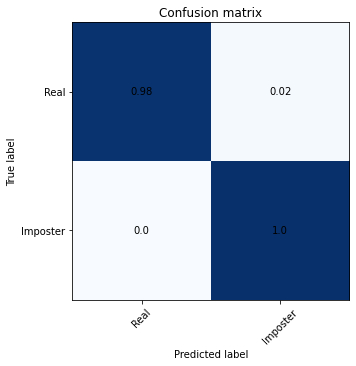

In [19]:
#HSV
clf = ImageQualissessmentPAD()
X_train_in_nparray = clf.DataGenerator(X_train, 'BoulkenafetHSV')
# X_train_in_nparray = load('features/Xtrain_42_HSV.npy')
clf.fit(X_train_in_nparray, y_train)
X_test_in_nparray = clf.DataGenerator(X_test, 'BoulkenafetHSV')
# X_test_in_nparray = load('features/Xtest_42_HSV.npy')
y_pred = clf.predict(X_test_in_nparray)
labels = ['Real', 'Imposter']
evaluate(y_pred, y_test, labels)


In [ ]:
#HSV
clf = ImageQualissessmentPAD()
# X_train_in_nparray = clf.DataGenerator(X_train, 'BoulkenafetHSV')
X_train_in_nparray = load('data/Xtrain_42_Galbally.npy')
clf.fit(X_train_in_nparray, y_train)
# X_test_in_nparray = clf.DataGenerator(X_test, 'BoulkenafetHSV')
X_test_in_nparray = load('data/Xtest_42_Galbally.npy')
y_pred = clf.predict(X_test_in_nparray)
labels = ['Real', 'Imposter']
evaluate(y_pred, y_test, labels)


In [ ]:
X_test_in_nparray = clf.DataGenerator(X_test)


peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
sig2noi
struct
maxdiff
avgdiff
normabserr
rAvgmaxdiff
edge
corner
peak
s

In [20]:
#Saving training and testing numpy files
# dump(X_test_in_nparray,'features/Xtest_42_HSV.npy')
# dump(np.array(y_test),'features/ytest_42_HSV.npy')
# dump(X_train_in_nparray,'features/Xtrain_42_HSV.npy')
# dump(np.array(y_train),'features/ytrain_42_HSV.npy')

['features/ytrain_42_HSV.npy']